In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
data = load_breast_cancer()
data.data.shape

(569, 30)

In [7]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9648809523809524

##  学习曲线

0.9631265664160402 71


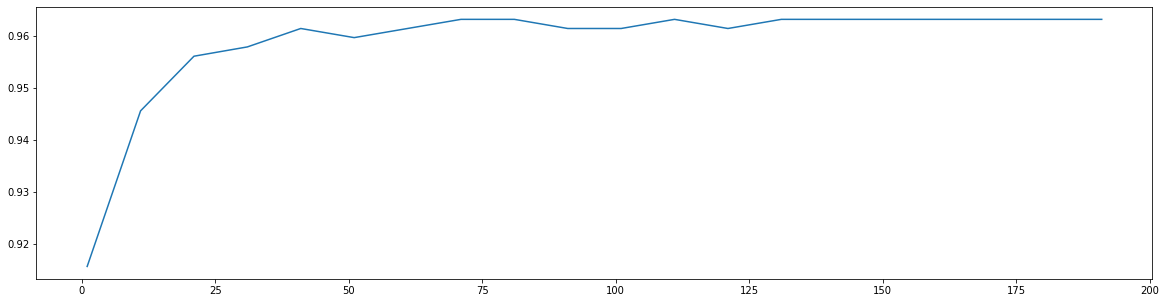

In [6]:
score1 = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    score1.append(score)
    
print(max(score1),(score1.index(max(score1))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),score1)
plt.show()

0.9666353383458647 73


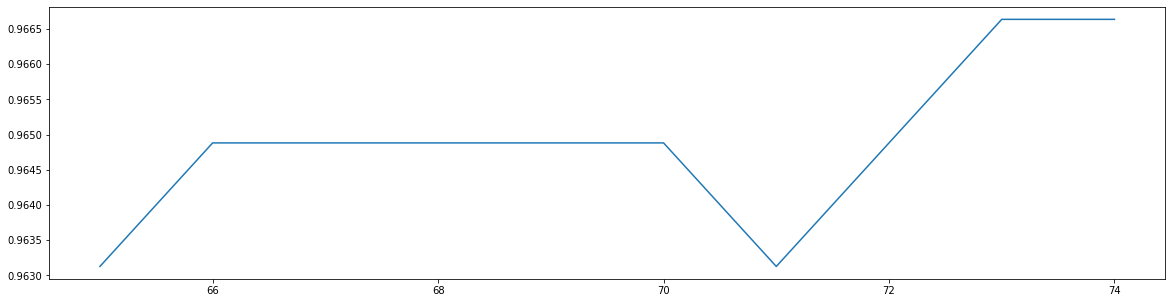

In [10]:
score1 = []
for i in range(65,75):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    score1.append(score)
    
print(max(score1),([*range(65,75)][score1.index(max(score1))]))
plt.figure(figsize=[20,5])
plt.plot(range(65,75),score1)
plt.show()

### 网格搜索

In [17]:
param_grid = {'max_depth':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=73,
                            random_state=90,
                            max_features=24)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GS.best_params_

{'max_depth': 9}

In [18]:
GS.best_score_

0.9666666666666668

In [15]:
param_grid = {'max_features':np.arange(5,30,1)}

rfc = RandomForestClassifier(n_estimators=73,
                            random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GS.best_params_

{'max_features': 24}

In [16]:
GS.best_score_

0.9666666666666668

In [22]:
param_grid = {'criterion':['entropy','gini']}

rfc = RandomForestClassifier(n_estimators=73,
                            random_state=90,
                            max_features=24)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GS.best_params_

{'criterion': 'gini'}

In [23]:
GS.best_score_ - score_pre

0.0017857142857143904